In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [116]:
df_movie=pd.read_csv("movies.csv",encoding='unicode_escape')
df_movie.dropna(inplace=True)
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [118]:
df_movie.shape

(5659, 10)

In [120]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [122]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [124]:
df_movie['Year']=df_movie["Year"].str.replace(r'[()]','',regex=True).astype(int)

In [126]:
df_movie['Duration']= pd.to_numeric(df_movie['Duration'].str.replace('min',''))

In [128]:
df_movie["Genre"]=df_movie['Genre'].str.split(', ')
df_movie=df_movie.explode("Genre")
df_movie['Genre'].fillna(df_movie['Genre'].mode()[0],inplace=True)

C:\Users\Sumit\AppData\Local\Temp\ipykernel_11068\1523700001.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [130]:
df_movie['Votes']=pd.to_numeric(df_movie['Votes'].str.replace(',',''))

In [132]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


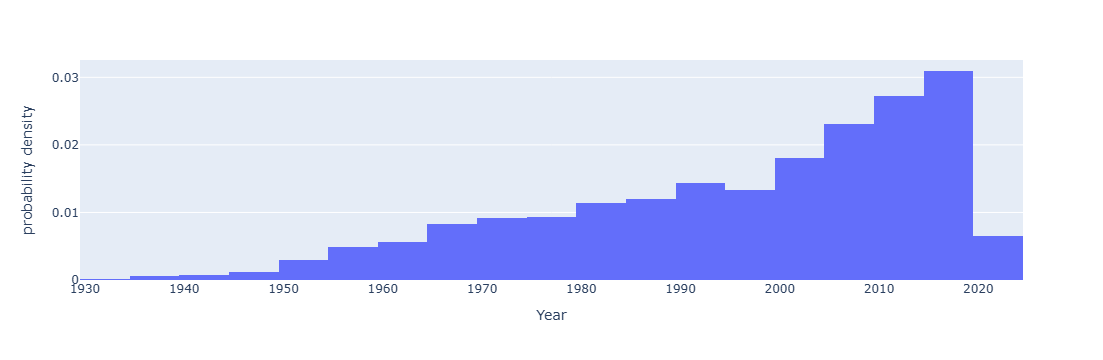

In [134]:
year=px.histogram(df_movie,x="Year",histnorm='probability density',nbins=30)
year.show()

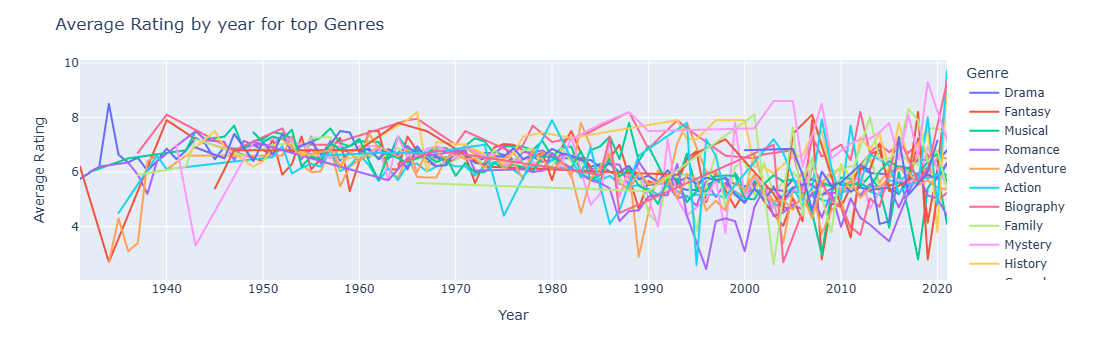

In [136]:
avg_rating_by_year=df_movie.groupby(['Year','Genre'])["Rating"].mean().reset_index()
top_genres=df_movie['Genre'].value_counts().head(10).index
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]
fig=px.line(avg_rating_by_year,x="Year",y='Rating',color='Genre')
fig.update_layout(title="Average Rating by year for top Genres",xaxis_title='Year', yaxis_title='Average Rating')
fig.show()

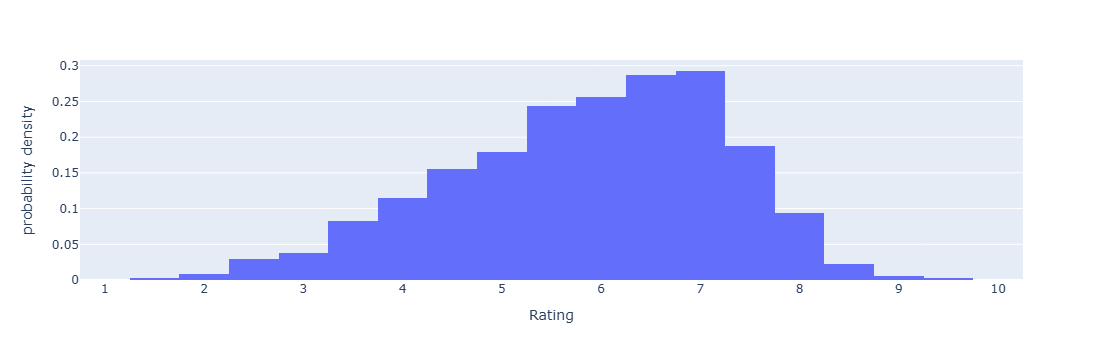

In [138]:
rating_fig=px.histogram(df_movie,x="Rating",histnorm='probability density',nbins=40)
rating_fig.show()

In [140]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [142]:
df_movie.drop("Name",axis=1,inplace=True)

In [161]:
df_movie['Genre_mean_rating'] = df_movie.groupby('Genre')['Rating'].transform('mean')

director_mean_rating=df_movie.groupby("Director")["Rating"].transform('mean')
df_movie['Director_encoded']=director_mean_rating

actor1_mean_rating=df_movie.groupby("Actor 1")["Rating"].transform('mean')
df_movie['Actor1_encoded']=actor1_mean_rating

actor2_mean_rating=df_movie.groupby("Actor 2")["Rating"].transform('mean')
df_movie['Actor2_encoded']=actor2_mean_rating

actor3_mean_rating=df_movie.groupby("Actor 3")["Rating"].transform('mean')
df_movie['Actor3_encoded']=actor3_mean_rating

In [163]:
x = df_movie[['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded']]
y = df_movie['Rating']


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [169]:
Model=LinearRegression()
Model.fit(x_train,y_train)
Model_pred=(Model.predict(x_test))

In [171]:
print("the performance evaluation of logistics Regression is below:\n")
print("mean squared error:",mean_squared_error(y_test,Model_pred))
print("mean absolute error:",mean_absolute_error(y_test,Model_pred))
print('R2 Score:',r2_score(y_test,Model_pred))

the performance evaluation of logistics Regression is below:

mean squared error: 0.4465441653985703
mean absolute error: 0.4921902540765641
R2 Score: 0.7641133663863862


In [173]:
x.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [175]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [177]:
data={'Year':[2019],'Votes':[36],'Duration':[111],'Genre_mean_rating':[5.8],'Director_encoded':[4.5],'Actor1_encoded':[5.3],'Actor2_encoded':[4.5],'Actor3_encoded':[4.5]}
trail=pd.DataFrame(data)
    

In [179]:
rating_predicted=Model.predict(trail)
print("predicted Rating:",rating_predicted[0])

predicted Rating: 4.2074589621343295
